In [4]:
# CCTV Seoul
import pandas as pd
import numpy as np

cctv_seoul = pd.read_csv("CCTV_Seoul.csv", encoding='utf-8')
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [59]:
cctv_seoul.columns
cctv_seoul.columns[0]
cctv_seoul.rename(columns={cctv_seoul.columns[0] : '구별'}, inplace=True) # 칼럼명 변경

In [65]:


cctv_seoul['최근증가율'] = (cctv_seoul['2016년'] + cctv_seoul['2015년'] + cctv_seoul['2014년']) / cctv_seoul['2013년도 이전'] * 100
cctv_seoul.sort_values(by=['최근증가율'], ascending=False)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765
19,영등포구,904,495,214,195,373,157.979798
0,강남구,2780,1292,430,584,932,150.619195
4,관악구,1496,846,260,390,613,149.290780
23,중구,671,413,190,72,348,147.699758
11,동작구,1091,544,341,103,314,139.338235


In [78]:
# Population Seoul
pop_seoul = pd.read_excel("population_Seoul.xls", encoding='utf-8', header=2, usecols='B, D, G, J, N')
pop_seoul.head()

pop_seoul.rename(columns = {pop_seoul.columns[0] : '구별'}, inplace = True)
pop_seoul.rename(columns = {pop_seoul.columns[1] : '인구수'}, inplace = True)
pop_seoul.rename(columns = {pop_seoul.columns[2] : '한국인'}, inplace = True)
pop_seoul.rename(columns = {pop_seoul.columns[3] : '외국인'}, inplace = True)
pop_seoul.rename(columns = {pop_seoul.columns[4] : '고령자'}, inplace = True)

pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100

pop_seoul.sort_index(axis=1)
pop_seoul.sort_values(by='고령자비율', ascending=False) # Sorting
pop_seoul.sort_values(by=['인구수', '한국인'], ascending=[True, True])

pop_seoul.drop(0, inplace=True)
pop_seoul['구별'].unique()
pop_seoul['구별'].isnull()
pop_seoul[pop_seoul['구별'].isnull()]
pop_seoul.drop([26], inplace = True)


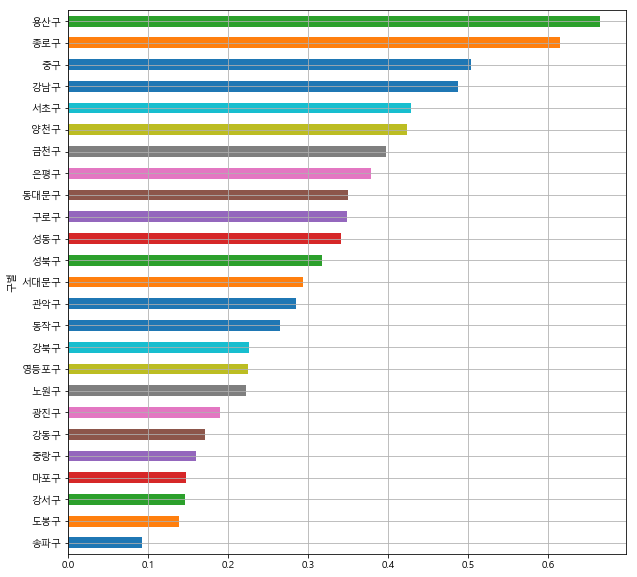

In [106]:
data_result = pd.merge(cctv_seoul, pop_seoul, on='구별')

del data_result['2016년']
del data_result['2015년']
del data_result['2014년']
del data_result['2013년도 이전']

data_result.sort_values('소계', inplace=True)
data_result.set_index('구별', inplace=True)

data_result['CCTV비율'] = data_result['소계']/ data_result['인구수'] * 100
data_result.sort_values('CCTV비율', inplace=True)


import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)



data_result['CCTV비율'].plot(kind='barh', grid=True, figsize=(10,10))
